<a href="https://colab.research.google.com/github/meo4739/DACON_Cohort_RFM/blob/main/%5B%EC%88%98%EC%97%85%5D_6%ED%9A%8C%EC%B0%A8_Pandas_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

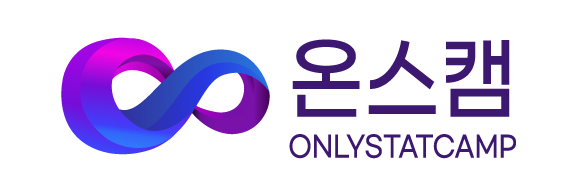

<img src="https://pandas.pydata.org/static/img/pandas.svg" height="100">

In [1]:
# Pandas 패키지 불러오기
import pandas as pd

In [10]:
import os
display(os.getcwd())
display(os.listdir('../'))

'/content'

['srv',
 'sbin',
 'usr',
 'dev',
 'libx32',
 'media',
 'sys',
 'lib',
 'opt',
 'mnt',
 'boot',
 'tmp',
 'home',
 'root',
 'etc',
 'bin',
 'lib64',
 'proc',
 'run',
 'lib32',
 'var',
 'content',
 'kaggle',
 '.dockerenv',
 'tools',
 'datalab',
 'NGC-DL-CONTAINER-LICENSE',
 'cuda-keyring_1.0-1_all.deb']

---

# 1.Data Science Salaries

https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

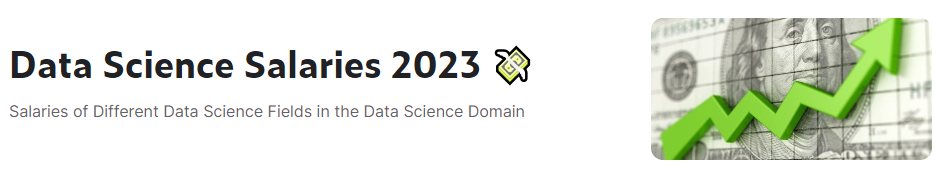

In [15]:
data = pd.read_excel("/content/Data Science Salaries 2023.xlsx")

### 1.1. 데이터 살펴보기

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


> Column 정보
* work_year: 근무 연도
* experience_level: 경험 수준 (예: SE - Senior, MI - Mid-level)
* employment_type: 고용 형태 (예: FT - Full-time, CT - Contract)
* job_title: 직책 (예: Principal Data Scientist, ML Engineer)
* salary: 해당 salary_currency로 표시된 급여
* salary_currency: 급여의 통화 단위
* salary_in_usd: USD로 환산된 급여
* employee_residence: 직원의 거주 국가
* remote_ratio: 원격 근무 비율 (백분율)
* company_location: 회사 위치
* company_size: 회사 규모 (예: S - Small, M - Medium, L - Large)

In [17]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [18]:
data.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


## 1.2. 한글 컬럼명으로 바꾸기

In [19]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [20]:
data.columns = [
    '근무연도',
    '경험수준',
    '고용형태',
    '직책',
    '급여',
    '급여통화',
    'USD환산급여',
    '거주국가',
    '원격근무비율',
    '회사위치',
    '회사규모'
]

In [21]:
data

,근무연도,경험수준,고용형태,직책,급여,급여통화,USD환산급여,거주국가,원격근무비율,회사위치,회사규모
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# 2.한글 폰트 설치하기

In [22]:
# 한글 폰트 설치
! rm -rf NanumFont*
! wget http://cdn.naver.com/naver/NanumFont/fontfiles/NanumFont_TTF_ALL.zip
! unzip NanumFont_TTF_ALL.zip -d NanumFont
! rm -rf NanumFont_TTF_ALL.zip

--2024-06-15 01:25:27--  http://cdn.naver.com/naver/NanumFont/fontfiles/NanumFont_TTF_ALL.zip
Resolving cdn.naver.com (cdn.naver.com)... 183.111.124.156, 125.209.207.11, 183.111.124.157
Connecting to cdn.naver.com (cdn.naver.com)|183.111.124.156|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14946146 (14M) [application/zip]
Saving to: ‘NanumFont_TTF_ALL.zip’

NanumFont_TTF_ALL.z 100%[===================>]  14.25M  6.74MB/s    in 2.1s    

2024-06-15 01:25:30 (6.74 MB/s) - ‘NanumFont_TTF_ALL.zip’ saved [14946146/14946146]

Archive:  NanumFont_TTF_ALL.zip
  inflating: NanumFont/NanumBrush.ttf  
  inflating: NanumFont/NanumGothic.ttf  
  inflating: NanumFont/NanumGothicBold.ttf  
  inflating: NanumFont/NanumGothicExtraBold.ttf  
  inflating: NanumFont/NanumMyeongjo.ttf  
  inflating: NanumFont/NanumMyeongjoBold.ttf  
  inflating: NanumFont/NanumMyeongjoExtraBold.ttf  
  inflating: NanumFont/NanumPen.ttf  


In [23]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = '/content/NanumFont/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 3.scatter plot

In [24]:
# 환율 정보를 가져와서 USD를 KRW로 변환
usd_to_krw_rate = 1383.09
data['KRW환산급여'] = data['USD환산급여'] * usd_to_krw_rate

# 경험수준 컬럼을 한글로 변환한 새로운 컬럼 생성
data['경험수준_한글'] = data['경험수준'].map({
    'EX': '임원',
    'SE': '고위',
    'MI': '중간',
    'EN': '신입'
})

In [25]:
data.head(1)

,근무연도,경험수준,고용형태,직책,급여,급여통화,USD환산급여,거주국가,원격근무비율,회사위치,회사규모,KRW환산급여,경험수준_한글
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,1.187341e+08,고위


<Axes: xlabel='경험수준_한글', ylabel='KRW환산급여'>

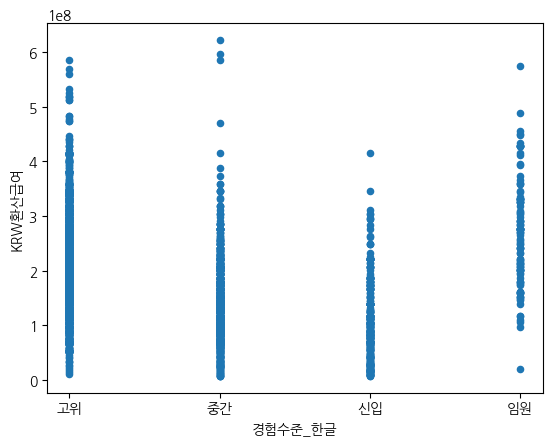

In [26]:
data.plot.scatter(x="경험수준_한글", y="KRW환산급여")

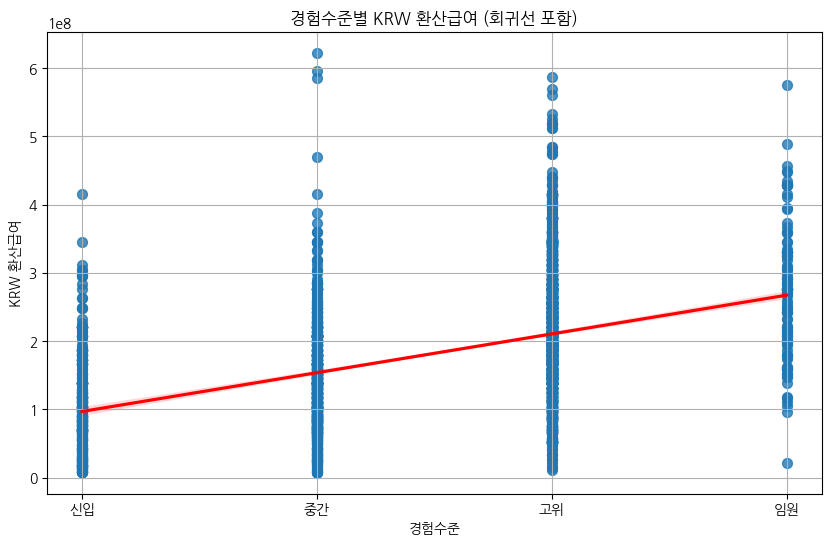

In [27]:
import seaborn as sns

# Create a scatter plot with regression line for '경험수준_한글' vs 'KRW환산급여'
plt.figure(figsize=(10, 6))
sns.regplot(
    x=data['경험수준_한글'].map({'신입': 1, '중간': 2, '고위': 3, '임원': 4}),
    y=data['KRW환산급여'],
    scatter_kws={'s': 50},
    line_kws={'color': 'red'}
)
plt.title('경험수준별 KRW 환산급여 (회귀선 포함)')
plt.xlabel('경험수준')
plt.ylabel('KRW 환산급여')
plt.xticks(ticks=[1, 2, 3, 4], labels=['신입', '중간', '고위', '임원'])
plt.grid(True)
plt.show()

# 4.box plot

KRW환산급여    Axes(0.125,0.11;0.775x0.77)
dtype: object

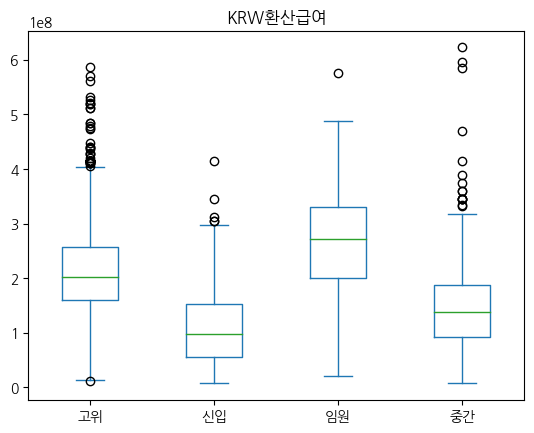

In [28]:
data.plot.box(by="경험수준_한글", column="KRW환산급여")

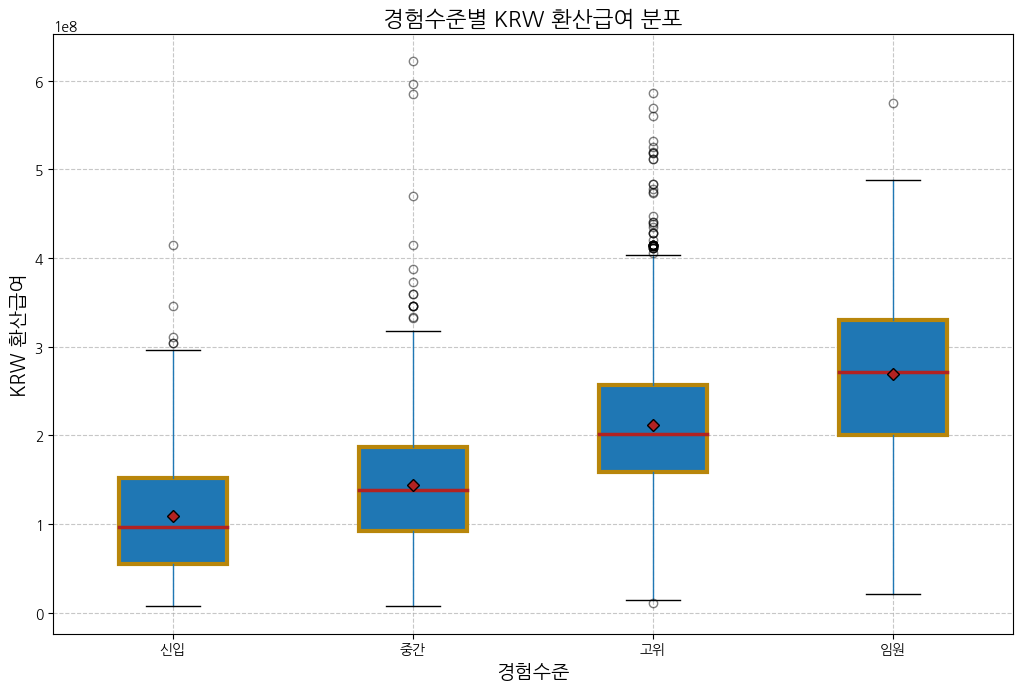

In [30]:
data['경험수준_한글'] = pd.Categorical(data['경험수준_한글'], categories=['신입', '중간', '고위', '임원'], ordered=True)

# 박스의 속성을 정의합니다. 실선 스타일, 선 너비 3, 색상은 어두운 황금색입니다.
boxprops = dict(linestyle='-', linewidth=3, color='darkgoldenrod')
# 이상치(flier)의 속성을 정의합니다. 마커는 'o', 색상은 빨간색, 투명도는 0.5입니다.
flierprops = dict(marker='o', color='red', alpha=0.5)
# 중앙값(median)의 속성을 정의합니다. 실선 스타일, 선 너비 2.5, 색상은 파이어브릭(짙은 붉은색)입니다.
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
# 평균(mean) 포인트의 속성을 정의합니다. 마커는 'D', 마커 테두리 색상은 검정색, 마커 내부 색상은 파이어브릭입니다.
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick')

data.boxplot(
    column='KRW환산급여',
    by='경험수준_한글',
    boxprops=boxprops,
    flierprops=flierprops,
    medianprops=medianprops,
    meanprops=meanpointprops,
    showmeans=True,
    patch_artist=True,
    figsize=(12, 8)
)

plt.title('경험수준별 KRW 환산급여 분포', fontsize=16)
plt.suptitle('')  # Suppress the default title
plt.xlabel('경험수준', fontsize=14)
plt.ylabel('KRW 환산급여', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

# 5.histogram plot

<Axes: >

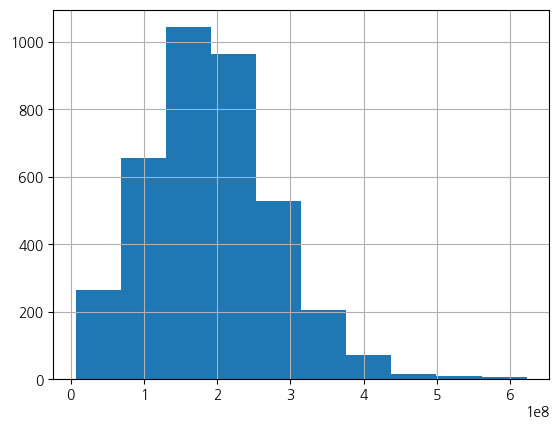

In [31]:
data.KRW환산급여.hist()

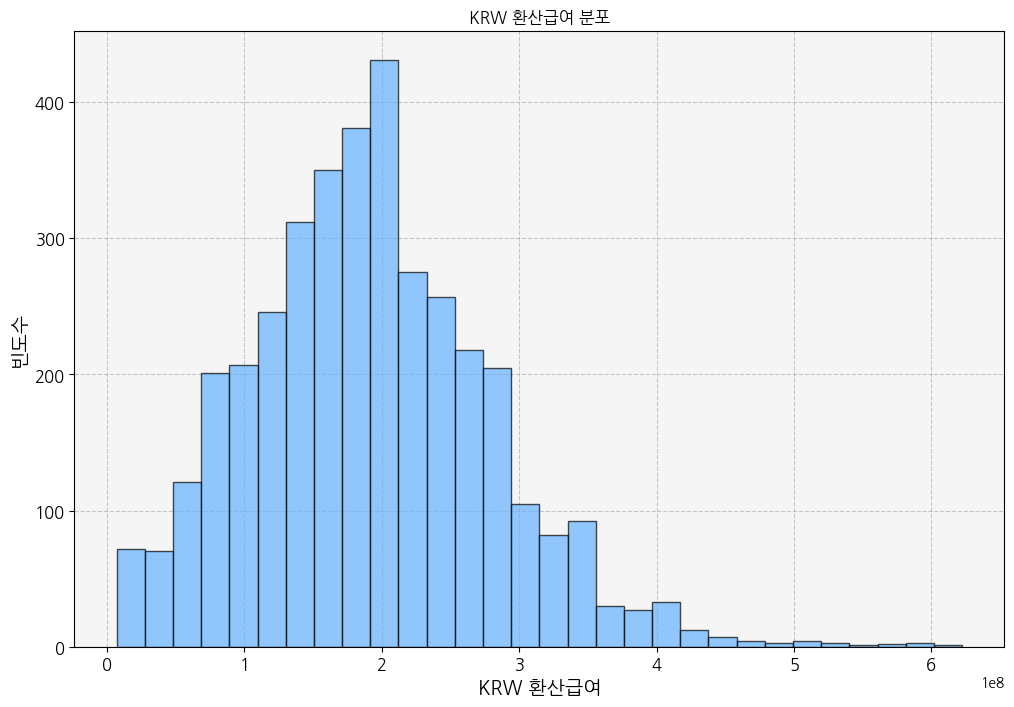

In [32]:
data['KRW환산급여'].plot.hist(
    figsize=(12, 8),  # 그래프 크기 설정 (가로 12인치, 세로 8인치)
    bins=30,  # 30개의 구간 적용
    color='#66B2FF',  # 막대 색상 설정
    edgecolor='black',  # 막대 테두리 색상 설정
    alpha=0.7,  # 막대 투명도 설정
    title='KRW 환산급여 분포'  # 그래프 제목 설정
)

# 축 라벨 설정
plt.xlabel('KRW 환산급여', fontsize=14)  # x축 라벨과 글꼴 크기 설정
plt.ylabel('빈도수', fontsize=14)  # y축 라벨과 글꼴 크기 설정

# 그리드와 스타일 설정
plt.grid(True, linestyle='--', alpha=0.7)  # 그리드 설정 (점선 스타일, 투명도 0.7)
plt.gca().set_axisbelow(True)  # 그리드를 데이터 뒤에 배치

# 눈금 매개변수 설정
plt.tick_params(axis='both', which='major', labelsize=12)  # 눈금 라벨 크기 설정

# 배경 색상 추가
plt.gca().set_facecolor('#F5F5F5')  # 배경 색상 설정

# 그래프 표시
plt.show()  # 그래프 출력

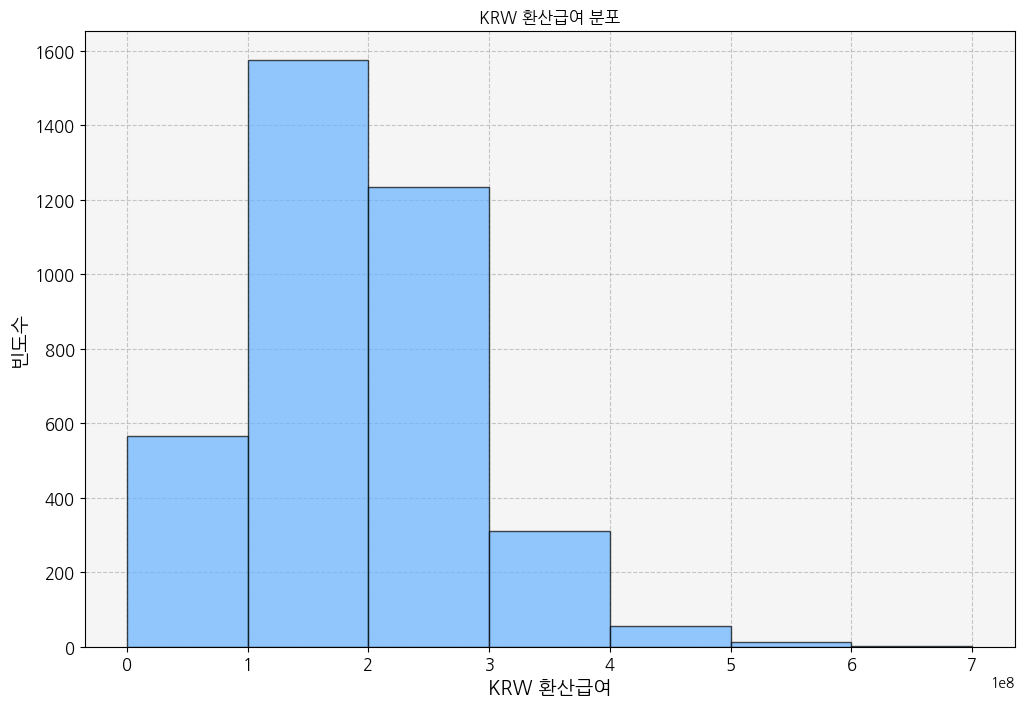

In [33]:
# 'KRW환산급여'에 대한 히스토그램을 1억원 단위로 구분하여 생성
bin_edges = range(0, int(data['KRW환산급여'].max()) + 100000000, 100000000)  # 1억원 단위로 구간 설정

data['KRW환산급여'].plot.hist(
    figsize=(12, 8),  # 그래프 크기 설정 (가로 12인치, 세로 8인치)
    bins=bin_edges,  # 설정한 구간 적용
    color='#66B2FF',  # 막대 색상 설정
    edgecolor='black',  # 막대 테두리 색상 설정
    alpha=0.7,  # 막대 투명도 설정
    title='KRW 환산급여 분포'  # 그래프 제목 설정
)

# 축 라벨 설정
plt.xlabel('KRW 환산급여', fontsize=14)  # x축 라벨과 글꼴 크기 설정
plt.ylabel('빈도수', fontsize=14)  # y축 라벨과 글꼴 크기 설정

# 그리드와 스타일 설정
plt.grid(True, linestyle='--', alpha=0.7)  # 그리드 설정 (점선 스타일, 투명도 0.7)
plt.gca().set_axisbelow(True)  # 그리드를 데이터 뒤에 배치

# 눈금 매개변수 설정
plt.tick_params(axis='both', which='major', labelsize=12)  # 눈금 라벨 크기 설정

# 배경 색상 추가
plt.gca().set_facecolor('#F5F5F5')  # 배경 색상 설정

# 그래프 표시
plt.show()  # 그래프 출력

# 6.bar plot

In [34]:
level_mean = data.groupby("경험수준_한글").KRW환산급여.mean()
level_mean

경험수준_한글
신입    1.086366e+08
중간    1.445688e+08
고위    2.116834e+08
임원    2.696070e+08
Name: KRW환산급여, dtype: float64

<Axes: xlabel='경험수준_한글'>

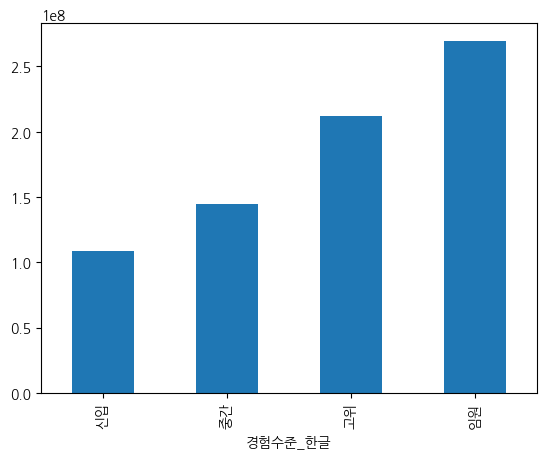

In [35]:
level_mean.plot.bar()

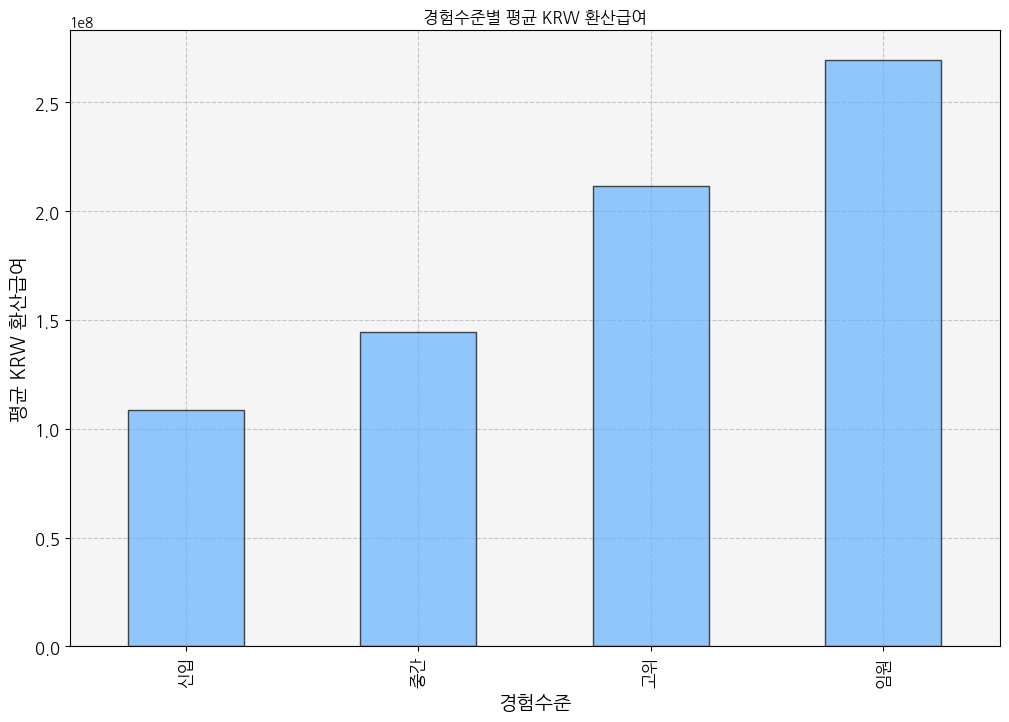

In [36]:
# 막대 그래프로 시각화
level_mean.plot.bar(
    figsize=(12, 8),  # 그래프 크기 설정 (가로 12인치, 세로 8인치)
    color='#66B2FF',  # 막대 색상 설정
    edgecolor='black',  # 막대 테두리 색상 설정
    alpha=0.7,  # 막대 투명도 설정
    title='경험수준별 평균 KRW 환산급여'  # 그래프 제목 설정
)

# 축 라벨 설정
plt.xlabel('경험수준', fontsize=14)  # x축 라벨과 글꼴 크기 설정
plt.ylabel('평균 KRW 환산급여', fontsize=14)  # y축 라벨과 글꼴 크기 설정

# 그리드와 스타일 설정
plt.grid(True, linestyle='--', alpha=0.7)  # 그리드 설정 (점선 스타일, 투명도 0.7)
plt.gca().set_axisbelow(True)  # 그리드를 데이터 뒤에 배치

# 눈금 매개변수 설정
plt.tick_params(axis='both', which='major', labelsize=12)  # 눈금 라벨 크기 설정

# 배경 색상 추가
plt.gca().set_facecolor('#F5F5F5')  # 배경 색상 설정

# 그래프 표시
plt.show()  # 그래프 출력

In [ ]:
# 막대 그래프로 시각화
plt.figure(figsize=(12, 8))
bars = plt.bar(
    level_mean.index,  # x축 값
    level_mean.values,  # y축 값
    color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'],  # 막대 색상
    edgecolor='black',  # 막대 테두리 색상
    alpha=0.85  # 막대 투명도
)

# 막대 위에 값을 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f'{yval:,.0f} KRW',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

# 축 라벨과 제목 설정
plt.title('경험수준별 평균 KRW 환산급여', fontsize=18, fontweight='bold')
plt.xlabel('경험수준', fontsize=16)
plt.ylabel('평균 KRW 환산급여', fontsize=16)

# 그리드와 스타일 설정
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)

# 눈금 매개변수 설정
plt.tick_params(axis='both', which='major', labelsize=14)

# 배경 색상 추가
plt.gca().set_facecolor('#F5F5F5')

# 그래프 표시
plt.show()

In [ ]:
pivot = data.pivot_table(
    values="KRW환산급여",
    index="경험수준_한글",
    columns="근무연도",
    aggfunc="mean"
)
pivot

In [ ]:
pivot.plot.barh()

In [ ]:
# 수평 막대 그래프 그리기
pivot.plot.barh(
    figsize=(12, 8),  # 그래프 크기 설정 (가로 12인치, 세로 8인치)
    alpha=0.75,  # 막대 투명도 설정
    edgecolor='black'  # 막대 테두리 색상 설정
)

# 축 라벨과 제목 설정
plt.title('근무연도별 경험수준별 평균 KRW 환산급여', fontsize=18, fontweight='bold')  # 제목과 글꼴 설정
plt.xlabel('평균 KRW 환산급여 (억 단위)', fontsize=16)  # x축 라벨과 글꼴 설정
plt.ylabel('경험수준', fontsize=16)  # y축 라벨과 글꼴 설정

# 그리드와 스타일 설정
plt.grid(True, linestyle='--', alpha=0.7)  # 그리드 설정 (점선 스타일, 투명도 0.7)
plt.gca().set_axisbelow(True)  # 그리드를 데이터 뒤에 배치

# 눈금 매개변수 설정
plt.tick_params(axis='both', which='major', labelsize=14)  # 눈금 라벨 크기 설정

# 배경 색상 추가
plt.gca().set_facecolor('#F5F5F5')  # 배경 색상 설정

# 막대 위에 값을 억 단위로 표시
for container in plt.gca().containers:  # 각 막대에 대해
    labels = [f'{(value / 1e8):.2f}억' for value in container.datavalues]  # 값을 억 단위로 변환하여 라벨 생성
    plt.gca().bar_label(container, labels=labels, label_type='edge', fontsize=12, fontweight='bold')  # 라벨 추가

# 그래프 표시
plt.show()  # 그래프 출력


In [ ]:
pivot = data.pivot_table(
    values="KRW환산급여",
    index="근무연도",
    columns="경험수준_한글",
    aggfunc="mean"
)
pivot

In [ ]:
pivot.plot.barh(stacked=True)

In [ ]:
# 스택형 수평 막대 그래프 그리기
pivot.plot.barh(
    figsize=(12, 8),  # 그래프 크기 설정 (가로 12인치, 세로 8인치)
    alpha=0.75,  # 막대 투명도 설정
    edgecolor='black',  # 막대 테두리 색상 설정
    stacked=True  # 스택형 그래프로 설정
)

# 축 라벨과 제목 설정
plt.title('근무연도별 경험수준별 평균 KRW 환산급여', fontsize=18, fontweight='bold')  # 제목과 글꼴 설정
plt.xlabel('평균 KRW 환산급여 (억 단위)', fontsize=16)  # x축 라벨과 글꼴 설정
plt.ylabel('근무연도', fontsize=16)  # y축 라벨과 글꼴 설정

# 그리드와 스타일 설정
plt.grid(True, linestyle='--', alpha=0.7)  # 그리드 설정 (점선 스타일, 투명도 0.7)
plt.gca().set_axisbelow(True)  # 그리드를 데이터 뒤에 배치

# 눈금 매개변수 설정
plt.tick_params(axis='both', which='major', labelsize=14)  # 눈금 라벨 크기 설정

# 배경 색상 추가
plt.gca().set_facecolor('#F5F5F5')  # 배경 색상 설정

# 그래프 표시
plt.show()  # 그래프 출력


In [ ]:
# 각 연도별로 경험수준_한글의 비중 계산
pivot_percentage = pivot.div(pivot.sum(axis=1), axis=0) * 100
pivot_percentage

In [ ]:
# 스택형 수평 막대 그래프 그리기
ax = pivot.plot.barh(
    figsize=(12, 8),  # 그래프 크기 설정 (가로 12인치, 세로 8인치)
    alpha=0.75,  # 막대 투명도 설정
    edgecolor='black',  # 막대 테두리 색상 설정
    stacked=True  # 스택형 그래프로 설정
)

# 축 라벨과 제목 설정
plt.title('근무연도별 경험수준별 평균 KRW 환산급여', fontsize=18, fontweight='bold')  # 제목과 글꼴 설정
plt.xlabel('평균 KRW 환산급여 (억 단위)', fontsize=16)  # x축 라벨과 글꼴 설정
plt.ylabel('근무연도', fontsize=16)  # y축 라벨과 글꼴 설정

# 그리드와 스타일 설정
plt.grid(True, linestyle='--', alpha=0.7)  # 그리드 설정 (점선 스타일, 투명도 0.7)
plt.gca().set_axisbelow(True)  # 그리드를 데이터 뒤에 배치

# 눈금 매개변수 설정
plt.tick_params(axis='both', which='major', labelsize=14)  # 눈금 라벨 크기 설정

# 배경 색상 추가
plt.gca().set_facecolor('#F5F5F5')  # 배경 색상 설정

# 각 연도별로 경험수준_한글의 비중을 계산하여 막대 위에 텍스트로 추가
for container in ax.containers:
    labels = [f'{v:.1f}%' for v in pivot_percentage[container.get_label()]]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=12, fontweight='bold', color='black')

# 그래프 표시
plt.show()  # 그래프 출력

# 7.line plot

In [ ]:
year_mean = data.groupby("근무연도").KRW환산급여.mean()
year_mean

In [ ]:
year_mean.plot.line()

In [ ]:
# 라인 그래프로 시각화
year_mean.plot.line(
    figsize=(12, 8),  # 그래프 크기 설정 (가로 12인치, 세로 8인치)
    color='#66B2FF',  # 선 색상 설정
    linewidth=2,  # 선 두께 설정
    marker='o',  # 데이터 포인트 마커 설정
    title='근무연도별 평균 KRW 환산급여'  # 그래프 제목 설정
)

# 축 라벨 설정
plt.xlabel('근무연도', fontsize=14)  # x축 라벨과 글꼴 크기 설정
plt.ylabel('평균 KRW 환산급여', fontsize=14)  # y축 라벨과 글꼴 크기 설정

# 그리드와 스타일 설정
plt.grid(True, linestyle='--', alpha=0.7)  # 그리드 설정 (점선 스타일, 투명도 0.7)
plt.gca().set_axisbelow(True)  # 그리드를 데이터 뒤에 배치

# x축 틱 설정
plt.xticks(year_mean.index, rotation=45)

# 배경 색상 추가
plt.gca().set_facecolor('#F5F5F5')  # 배경 색상 설정

# 그래프 표시
plt.show()  # 그래프 출력

In [ ]:
import numpy as np

# 근무연도별 평균 KRW 환산급여 계산
year_mean = data.groupby("근무연도").KRW환산급여.mean()

# 회귀선을 위한 다항식 피팅 (1차원, 선형 회귀)
z = np.polyfit(year_mean.index, year_mean, 1)
p = np.poly1d(z)


In [ ]:
# 라인 그래프로 시각화
plt.figure(figsize=(12, 8))
plt.plot(year_mean.index, year_mean, 'o-', color='#66B2FF', linewidth=2, markersize=8, label='평균 KRW 환산급여')

# 추세선 추가
plt.plot(year_mean.index, p(year_mean.index), "r--", label='추세선')

# 축 라벨과 제목 설정
plt.title('근무연도별 평균 KRW 환산급여', fontsize=18, fontweight='bold')
plt.xlabel('근무연도', fontsize=14)
plt.ylabel('평균 KRW 환산급여', fontsize=14)

# 그리드와 스타일 설정
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)

# 배경 색상 추가
plt.gca().set_facecolor('#F5F5F5')

# x축 틱 설정
plt.xticks(year_mean.index, rotation=45)

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()  # 그래프 출력

# 8.pie plot

In [ ]:
year_mean.plot.pie()

In [ ]:
# 파이 차트로 시각화
plt.figure(figsize=(12, 8))
year_mean.plot.pie(
    autopct='%1.1f%%',  # 각 섹션의 비율 표시 형식
    startangle=90,  # 파이 차트 시작 각도
    colors=plt.cm.Paired(np.arange(len(year_mean)))  # 색상 설정
)

# 제목 설정
plt.title('근무연도별 평균 KRW 환산급여 분포', fontsize=18, fontweight='bold')

# 파이 차트 표시
plt.ylabel('')  # y축 라벨 제거
plt.show()  # 그래프 출력

In [ ]:
# 파이 차트로 시각화
fig, ax = plt.subplots(figsize=(12, 8))
year_mean.plot.pie(
    autopct='%1.1f%%',  # 각 섹션의 비율 표시 형식
    startangle=90,  # 파이 차트 시작 각도
    colors=plt.cm.Paired(np.arange(len(year_mean))),  # 색상 설정
    ax=ax
)

# 중앙의 원을 추가하여 도넛 차트로 만듭니다.
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# 제목 설정
plt.title('근무연도별 평균 KRW 환산급여 분포', fontsize=18, fontweight='bold')

# 파이 차트 표시
plt.ylabel('')  # y축 라벨 제거
plt.show()  # 그래프 출력

# 9.style

In [ ]:
pivot = data.pivot_table(
    values="KRW환산급여",
    index="근무연도",
    columns="경험수준_한글",
    aggfunc="mean"
)
pivot

## 9.1. bar

In [ ]:
pivot = data.pivot_table(
    values="KRW환산급여",
    index="경험수준_한글",
    columns="근무연도",
    aggfunc="mean"
)
pivot

In [ ]:
pivot.style.bar()

In [ ]:
# subset 원하는 컬럼만 스타일 적용하기
pivot.style.bar(subset=[2022, 2023])

In [ ]:
# https://www.kaggle.com/code/subinium/simple-matplotlib-visualization-tips
def cmap_plot(cmap_list):
    cmaps = cmap_list

    n = len(cmaps)

    fig = plt.figure(figsize=(8.25, n*.20), dpi=200)
    ax = plt.subplot(1, 1, 1, frameon=False, xlim=[0,10], xticks=[], yticks=[])
    fig.subplots_adjust(top=0.99, bottom=0.01, left=0.18, right=0.99)

    y, dy, pad = 0, 0.3, 0.08

    ticks, labels = [], []

    for cmap in cmaps[::-1]:
        Z = np.linspace(0,1,512).reshape(1,512)
        plt.imshow(Z, extent=[0,10,y,y+dy], cmap=plt.get_cmap(cmap))
        ticks.append(y+dy/2)
        labels.append(cmap)
        y = y + dy + pad

    ax.set_ylim(-pad,y)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)

    ax.tick_params(axis='y', which='both', length=0, labelsize=5)
    plt.show()

In [ ]:
# 모든 colormap 이름을 가져오기
cmaps = plt.colormaps()
cmap_plot(cmaps)

In [ ]:
# cmap 컬러맵 바꾸기
pivot.style.bar(subset=[2022, 2023], cmap="Blues")

In [ ]:
# props 테이블 속성 바꾸기
pivot.style.bar(subset=[2022, 2023], cmap="Blues", props="width: 300px;")

In [ ]:
# props 테이블 속성 바꾸기
pivot.style.bar(subset=[2022, 2023], cmap="Blues", props="width: 300px;", vmin=0, vmax=500000000)

In [ ]:
# 변수로서 할당받아 각 컬럼마다 다른 스타일 적용
s = pivot.style
s.bar(subset=[2020])
s.bar(subset=[2021], cmap="Blues")
s.bar(subset=[2022], cmap="Blues", props="width: 300px;")
s.bar(subset=[2023], cmap="Blues", props="width: 300px;", vmin=0, vmax=500000000)
s

## 9.2. format

In [ ]:
pivot

In [ ]:
pivot.style.format(formatter="{:.1f}")

In [ ]:
s = pivot.style
s = s.format(subset=[2020, 2021], formatter="{:.1f}")
s

In [ ]:
s = pivot.style
s.format(subset=[2020])
s.format(subset=[2021], formatter="{:.0f}")
s.format(subset=[2022], formatter="{:.3f}")
s.format(subset=[2023], formatter="{:,.0f}")
s

## 9.3. background_gradient

In [ ]:
pivot.style.background_gradient()

In [ ]:
pivot.style.background_gradient(axis=1)

In [ ]:
pivot.style.background_gradient(axis=0)

In [ ]:
pivot.style.background_gradient(axis=None)

In [ ]:
pivot.style.background_gradient(axis=None, cmap="RdYlGn")

In [ ]:
pivot.style.background_gradient(subset=[2020, 2021], axis=None, cmap="RdYlGn")

## 9.4. highlight_min / highlight_max

In [ ]:
pivot.style.highlight_min()

In [ ]:
pivot.style.highlight_min(axis=None)

In [ ]:
pivot.style.highlight_min(axis=None, color="red")

In [ ]:
pivot.style.highlight_max(axis=None, color="green")

In [ ]:
pivot.style.highlight_max(axis=None, color="green").highlight_min(axis=None, color="red")

## 9.4. 한번에 적용하기

In [ ]:
s= pivot.style
s = s.background_gradient(subset=[2020, 2021], axis=None, cmap="RdYlGn")
s = s.bar(subset=[2022, 2023], cmap="Blues", props="width: 300px;", vmin=0, vmax=500000000)
s = s.format(subset=[2020])
s = s.format(subset=[2021], formatter="{:.0f}")
s = s.format(subset=[2022], formatter="{:.3f}")
s = s.format(subset=[2023], formatter="{:,.0f}")
s = s.highlight_max(axis=None, color="green")
s

In [ ]:
s.to_excel("pivot.xlsx")

---